In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import Adam
from pandas import concat
from pandas import read_csv
from helper import series_to_supervised, stage_series_to_supervised

In [2]:
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import numpy as np

### Dataset

In [3]:
dataset = pd.read_csv('../../../data/zeda/Merged-update_hourly.csv', index_col=0)
# dataset = pd.read_csv('data/zeda/Merged-update_flowpos.csv', index_col=0)
dataset.fillna(0, inplace=True)
data = dataset[:]
data

,WS_S1,WS_S4,FLOW_S25A,GATE_S25A,HWS_S25A,TWS_S25A,FLOW_S25B,GATE_S25B,GATE_S25B2,HWS_S25B,TWS_S25B,PUMP_S25B,FLOW_S26,GATE_S26_1,GATE_S26_2,HWS_S26,TWS_S26,PUMP_S26,MEAN_RAIN
Time,,,,,,,,,,,,,,,,,,,
1/1/10 00:00,0.33,0.34,0.0,0.0,2.17,0.49,0.0,0.0,0.0,2.84,0.58,0.0,0.00,0.0,0.00,2.78,0.505,0.0,0.0
1/1/10 01:00,-0.29,-0.28,0.0,0.0,2.17,0.02,0.0,0.0,0.0,2.84,-0.07,0.0,0.00,0.0,0.00,2.78,-0.110,0.0,0.0
1/1/10 02:00,-0.81,-0.73,0.0,0.0,2.17,-0.49,0.0,0.0,0.0,2.84,-0.62,0.0,0.00,0.0,0.00,2.79,-0.650,0.0,0.0
1/1/10 03:00,-0.98,-0.85,0.0,0.0,2.15,-0.75,0.0,0.0,0.0,2.83,-0.82,0.0,0.00,0.0,0.00,2.79,-0.850,0.0,0.0
1/1/10 04:00,-0.69,-0.49,0.0,0.0,2.13,-0.55,0.0,0.0,0.0,2.84,-0.53,0.0,0.00,0.0,0.00,2.79,-0.550,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/20 19:00,1.24,1.19,0.0,0.0,1.92,1.25,0.0,0.0,0.0,2.86,1.31,0.0,456.34,0.0,2.61,2.49,1.290,0.0,0.0
12/31/20 20:00,1.62,1.61,0.0,0.0,1.92,1.64,0.0,0.0,0.0,2.88,1.68,0.0,380.19,0.0,2.62,2.48,1.660,0.0,0.0
12/31/20 21:00,1.98,1.90,0.0,0.0,1.93,2.00,0.0,0.0,0.0,2.89,2.04,0.0,287.12,0.0,2.62,2.54,2.040,0.0,0.0


### Dataset Information

In [4]:
print(list(data.columns))

['WS_S1', 'WS_S4', 'FLOW_S25A', 'GATE_S25A', 'HWS_S25A', 'TWS_S25A', 'FLOW_S25B', 'GATE_S25B', 'GATE_S25B2', 'HWS_S25B', 'TWS_S25B', 'PUMP_S25B', 'FLOW_S26', 'GATE_S26_1', 'GATE_S26_2', 'HWS_S26', 'TWS_S26', 'PUMP_S26', 'MEAN_RAIN']


### Pre-processing

In [5]:
# specify the number of lag hours
n_hours = 24*7
K = 24

#### Stage

In [6]:
# Pre-processing
# Stage --> 8 stages
stages = dataset[['WS_S1', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']]
print("stages.shape:", stages.shape)

stages_supervised = series_to_supervised(stages, n_hours, K)
print("stages_supervised.shape:", stages_supervised.shape)

stages.shape: (96432, 4)
stages_supervised.shape: (96241, 768)


In [7]:
# stages_supervised

In [8]:
# stages_head = dataset[['HWS_S25A', 'HWS_S25B', 'HWS_S26']]
# print("stages_head.shape:", stages_head.shape)

# stages_head_supervised = series_to_supervised(stages_head, n_hours, K)
# print("stages_head_supervised.shape:", stages_head_supervised.shape)

In [9]:
# stages_head_supervised

#### Non-stage

In [10]:
# non_stages = data[['WS_S4', 'FLOW_S25A', 'GATE_S25A', 'FLOW_S25B', 'GATE_S25B', 'FLOW_S26', 'GATE_S26', 'PUMP_S26', 'PUMP_S25B', 'MEAN_RAIN']]
non_stages = data[['WS_S4', 'FLOW_S25A', 'FLOW_S25B', 'FLOW_S26', 'PUMP_S26', 'PUMP_S25B', 'MEAN_RAIN']]
print("non_stages.shape:", non_stages.shape)

non_stages_supervised = series_to_supervised(non_stages, n_hours-1, 1)
print("non_stages_supervised.shape:", non_stages_supervised.shape)

non_stages.shape: (96432, 7)
non_stages_supervised.shape: (96265, 1176)


In [11]:
# non_stages_supervised

In [12]:
non_stages_supervised_cut = non_stages_supervised.iloc[24:, :]
print("non_stages_supervised_cut.shape:", non_stages_supervised_cut.shape)

non_stages_supervised_cut.shape: (96241, 1176)


In [13]:
# non_stages_supervised_cut

### N_out, N_in, K

In [14]:
# specify the number of lag hours
# n_hours = 72
n_features = stages.shape[1] + non_stages.shape[1]   # 1 rainfall + FGate_S25A + FGate_S25B + FGate_S26 + 8WS + PUMP_S26
# K = 12

In [15]:
n_features

11

### Concatenation

In [16]:
# stages_head_supervised.reset_index(drop=True, inplace=True)
non_stages_supervised_cut.reset_index(drop=True, inplace=True)
stages_supervised.reset_index(drop=True, inplace=True)

all_data = concat([
                   non_stages_supervised_cut.iloc[:, :],
#                    stages_head_supervised.iloc[:, :-3*K],
                   stages_supervised.iloc[:, :]],
                   axis=1)

In [17]:
# print("all_data", all_data)
print("all_data.shape:", all_data.shape)

all_data.shape: (96241, 1944)


In [18]:
# all_concat = pd.DataFrame(all_data)
# all_concat

In [19]:
# all_concat.iloc[:, -12:]

### Train & Test set

In [20]:
all_data = all_data.values
n_train_hours = int(len(all_data)*0.8)
print("n_train_hours:", n_train_hours)


train = all_data[:n_train_hours, :]    # 0 column is the rainfall to measure heavy/medium/light
test = all_data[n_train_hours:, :]

n_train_hours: 76992


In [21]:
train.shape

(76992, 1944)

In [22]:
# test set (10/16/2018 - 12/30/3020)
# data.iloc[462368:, :]

### Normalization

In [23]:
n_hours

168

In [24]:
n_features

11

In [25]:
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -stages.shape[1]*K:]
test_X, test_y = test[:, :n_obs], test[:, -stages.shape[1]*K:]
print("train_X.shape, train_y.shape, test_X.shape, test_y.shape", train_X.shape, train_y.shape, test_X.shape, test_y.shape)


# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
train_X = scaler.fit_transform(train_X)
train_y = scaler.fit_transform(train_y)
test_X = scaler.fit_transform(test_X)
test_y = scaler.fit_transform(test_y)

train_X.shape, train_y.shape, test_X.shape, test_y.shape (76992, 1848) (76992, 96) (19249, 1848) (19249, 96)


In [26]:
n_obs

1848

In [27]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print("train_X.shape, train_y.shape, test_X.shape, test_y.shape: \n", train_X.shape, train_y.shape, test_X.shape, test_y.shape)

train_X.shape, train_y.shape, test_X.shape, test_y.shape: 
 (76992, 168, 11) (76992, 96) (19249, 168, 11) (19249, 96)


### Model

In [28]:
# Simple MLP Model
model_mlp_60 = keras.Sequential()
model_mlp_60.add(layers.Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model_mlp_60.add(layers.Dense(32, activation='relu'))
model_mlp_60.add(layers.Dense(8, activation='relu'))
model_mlp_60.add(layers.Dense(train_y.shape[1]))   # Regression -> No Need for Activation
model_mlp_60.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1848)              0         
                                                                 
 dense (Dense)               (None, 32)                59168     
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 96)                864       
                                                                 
Total params: 60,296
Trainable params: 60,296
Non-trainable params: 0
_________________________________________________________________


2022-07-23 23:15:51.862776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/2000
151/151 - 1s - loss: 0.1440 - mae: 0.3515 - val_loss: 0.2627 - val_mae: 0.4754 - 1s/epoch - 7ms/step
Epoch 2/2000
151/151 - 0s - loss: 0.1347 - mae: 0.3307 - val_loss: 0.2451 - val_mae: 0.4451 - 310ms/epoch - 2ms/step
Epoch 3/2000
151/151 - 0s - loss: 0.1297 - mae: 0.3190 - val_loss: 0.2402 - val_mae: 0.4366 - 310ms/epoch - 2ms/step
Epoch 4/2000
151/151 - 0s - loss: 0.1270 - mae: 0.3138 - val_loss: 0.2359 - val_mae: 0.4292 - 314ms/epoch - 2ms/step
Epoch 5/2000
151/151 - 0s - loss: 0.1246 - mae: 0.3091 - val_loss: 0.2317 - val_mae: 0.4227 - 320ms/epoch - 2ms/step
Epoch 6/2000
151/151 - 0s - loss: 0.1221 - mae: 0.3045 - val_loss: 0.2275 - val_mae: 0.4165 - 306ms/epoch - 2ms/step
Epoch 7/2000
151/151 - 0s - loss: 0.1197 - mae: 0.3000 - val_loss: 0.2233 - val_mae: 0.4106 - 308ms/epoch - 2ms/step
Epoch 8/2000
151/151 - 0s - loss: 0.1173 - mae: 0.2957 - val_loss: 0.2192 - val_mae: 0.4048 - 316ms/epoch - 2ms/step
Epoch 9/2000
151/151 - 0s - loss: 0.1149 - mae: 0.2914 - val_loss: 

Epoch 71/2000
151/151 - 0s - loss: 0.0150 - mae: 0.1024 - val_loss: 0.0288 - val_mae: 0.1394 - 324ms/epoch - 2ms/step
Epoch 72/2000
151/151 - 0s - loss: 0.0148 - mae: 0.1017 - val_loss: 0.0282 - val_mae: 0.1383 - 317ms/epoch - 2ms/step
Epoch 73/2000
151/151 - 0s - loss: 0.0145 - mae: 0.1011 - val_loss: 0.0277 - val_mae: 0.1372 - 307ms/epoch - 2ms/step
Epoch 74/2000
151/151 - 0s - loss: 0.0143 - mae: 0.1005 - val_loss: 0.0272 - val_mae: 0.1362 - 310ms/epoch - 2ms/step
Epoch 75/2000
151/151 - 0s - loss: 0.0141 - mae: 0.0999 - val_loss: 0.0267 - val_mae: 0.1352 - 335ms/epoch - 2ms/step
Epoch 76/2000
151/151 - 0s - loss: 0.0139 - mae: 0.0994 - val_loss: 0.0263 - val_mae: 0.1343 - 342ms/epoch - 2ms/step
Epoch 77/2000
151/151 - 0s - loss: 0.0138 - mae: 0.0988 - val_loss: 0.0259 - val_mae: 0.1334 - 326ms/epoch - 2ms/step
Epoch 78/2000
151/151 - 0s - loss: 0.0136 - mae: 0.0983 - val_loss: 0.0255 - val_mae: 0.1326 - 315ms/epoch - 2ms/step
Epoch 79/2000
151/151 - 0s - loss: 0.0135 - mae: 0.0979 

151/151 - 0s - loss: 0.0071 - mae: 0.0653 - val_loss: 0.0133 - val_mae: 0.0896 - 311ms/epoch - 2ms/step
Epoch 141/2000
151/151 - 0s - loss: 0.0070 - mae: 0.0647 - val_loss: 0.0131 - val_mae: 0.0889 - 359ms/epoch - 2ms/step
Epoch 142/2000
151/151 - 0s - loss: 0.0069 - mae: 0.0641 - val_loss: 0.0129 - val_mae: 0.0882 - 335ms/epoch - 2ms/step
Epoch 143/2000
151/151 - 0s - loss: 0.0068 - mae: 0.0635 - val_loss: 0.0127 - val_mae: 0.0874 - 329ms/epoch - 2ms/step
Epoch 144/2000
151/151 - 0s - loss: 0.0067 - mae: 0.0629 - val_loss: 0.0125 - val_mae: 0.0867 - 326ms/epoch - 2ms/step
Epoch 145/2000
151/151 - 0s - loss: 0.0066 - mae: 0.0623 - val_loss: 0.0124 - val_mae: 0.0860 - 324ms/epoch - 2ms/step
Epoch 146/2000
151/151 - 0s - loss: 0.0065 - mae: 0.0617 - val_loss: 0.0122 - val_mae: 0.0853 - 301ms/epoch - 2ms/step
Epoch 147/2000
151/151 - 0s - loss: 0.0064 - mae: 0.0611 - val_loss: 0.0120 - val_mae: 0.0845 - 320ms/epoch - 2ms/step
Epoch 148/2000
151/151 - 0s - loss: 0.0063 - mae: 0.0604 - val_

Epoch 209/2000
151/151 - 0s - loss: 0.0018 - mae: 0.0310 - val_loss: 0.0042 - val_mae: 0.0499 - 318ms/epoch - 2ms/step
Epoch 210/2000
151/151 - 0s - loss: 0.0018 - mae: 0.0307 - val_loss: 0.0041 - val_mae: 0.0495 - 315ms/epoch - 2ms/step
Epoch 211/2000
151/151 - 0s - loss: 0.0017 - mae: 0.0303 - val_loss: 0.0040 - val_mae: 0.0492 - 305ms/epoch - 2ms/step
Epoch 212/2000
151/151 - 0s - loss: 0.0017 - mae: 0.0300 - val_loss: 0.0040 - val_mae: 0.0488 - 304ms/epoch - 2ms/step
Epoch 213/2000
151/151 - 0s - loss: 0.0017 - mae: 0.0297 - val_loss: 0.0039 - val_mae: 0.0485 - 311ms/epoch - 2ms/step
Epoch 214/2000
151/151 - 0s - loss: 0.0016 - mae: 0.0294 - val_loss: 0.0039 - val_mae: 0.0482 - 324ms/epoch - 2ms/step
Epoch 215/2000
151/151 - 0s - loss: 0.0016 - mae: 0.0291 - val_loss: 0.0038 - val_mae: 0.0478 - 334ms/epoch - 2ms/step
Epoch 216/2000
151/151 - 0s - loss: 0.0016 - mae: 0.0288 - val_loss: 0.0037 - val_mae: 0.0475 - 332ms/epoch - 2ms/step
Epoch 217/2000
151/151 - 0s - loss: 0.0015 - mae

Epoch 277/2000
151/151 - 0s - loss: 7.5674e-04 - mae: 0.0205 - val_loss: 0.0023 - val_mae: 0.0381 - 314ms/epoch - 2ms/step
Epoch 278/2000
151/151 - 0s - loss: 7.5404e-04 - mae: 0.0204 - val_loss: 0.0023 - val_mae: 0.0380 - 313ms/epoch - 2ms/step
Epoch 279/2000
151/151 - 0s - loss: 7.5145e-04 - mae: 0.0204 - val_loss: 0.0022 - val_mae: 0.0380 - 311ms/epoch - 2ms/step
Epoch 280/2000
151/151 - 0s - loss: 7.4897e-04 - mae: 0.0203 - val_loss: 0.0022 - val_mae: 0.0379 - 317ms/epoch - 2ms/step
Epoch 281/2000
151/151 - 0s - loss: 7.4659e-04 - mae: 0.0203 - val_loss: 0.0022 - val_mae: 0.0379 - 313ms/epoch - 2ms/step
Epoch 282/2000
151/151 - 0s - loss: 7.4430e-04 - mae: 0.0203 - val_loss: 0.0022 - val_mae: 0.0378 - 318ms/epoch - 2ms/step
Epoch 283/2000
151/151 - 0s - loss: 7.4211e-04 - mae: 0.0202 - val_loss: 0.0022 - val_mae: 0.0378 - 328ms/epoch - 2ms/step
Epoch 284/2000
151/151 - 0s - loss: 7.4001e-04 - mae: 0.0202 - val_loss: 0.0022 - val_mae: 0.0377 - 323ms/epoch - 2ms/step
Epoch 285/2000
1

Epoch 344/2000
151/151 - 0s - loss: 6.7791e-04 - mae: 0.0192 - val_loss: 0.0020 - val_mae: 0.0361 - 326ms/epoch - 2ms/step
Epoch 345/2000
151/151 - 0s - loss: 6.7725e-04 - mae: 0.0192 - val_loss: 0.0020 - val_mae: 0.0361 - 326ms/epoch - 2ms/step
Epoch 346/2000
151/151 - 0s - loss: 6.7661e-04 - mae: 0.0192 - val_loss: 0.0020 - val_mae: 0.0361 - 314ms/epoch - 2ms/step
Epoch 347/2000
151/151 - 0s - loss: 6.7597e-04 - mae: 0.0192 - val_loss: 0.0020 - val_mae: 0.0360 - 317ms/epoch - 2ms/step
Epoch 348/2000
151/151 - 0s - loss: 6.7535e-04 - mae: 0.0192 - val_loss: 0.0020 - val_mae: 0.0360 - 320ms/epoch - 2ms/step
Epoch 349/2000
151/151 - 0s - loss: 6.7472e-04 - mae: 0.0192 - val_loss: 0.0020 - val_mae: 0.0360 - 320ms/epoch - 2ms/step
Epoch 350/2000
151/151 - 0s - loss: 6.7409e-04 - mae: 0.0192 - val_loss: 0.0020 - val_mae: 0.0360 - 315ms/epoch - 2ms/step
Epoch 351/2000
151/151 - 0s - loss: 6.7348e-04 - mae: 0.0192 - val_loss: 0.0020 - val_mae: 0.0360 - 314ms/epoch - 2ms/step
Epoch 352/2000
1

Epoch 411/2000
151/151 - 0s - loss: 6.4336e-04 - mae: 0.0187 - val_loss: 0.0019 - val_mae: 0.0350 - 342ms/epoch - 2ms/step
Epoch 412/2000
151/151 - 0s - loss: 6.4295e-04 - mae: 0.0187 - val_loss: 0.0019 - val_mae: 0.0349 - 343ms/epoch - 2ms/step
Epoch 413/2000
151/151 - 0s - loss: 6.4255e-04 - mae: 0.0187 - val_loss: 0.0019 - val_mae: 0.0349 - 320ms/epoch - 2ms/step
Epoch 414/2000
151/151 - 0s - loss: 6.4215e-04 - mae: 0.0187 - val_loss: 0.0019 - val_mae: 0.0349 - 327ms/epoch - 2ms/step
Epoch 415/2000
151/151 - 0s - loss: 6.4175e-04 - mae: 0.0187 - val_loss: 0.0019 - val_mae: 0.0349 - 353ms/epoch - 2ms/step
Epoch 416/2000
151/151 - 0s - loss: 6.4135e-04 - mae: 0.0186 - val_loss: 0.0019 - val_mae: 0.0349 - 319ms/epoch - 2ms/step
Epoch 417/2000
151/151 - 0s - loss: 6.4095e-04 - mae: 0.0186 - val_loss: 0.0019 - val_mae: 0.0349 - 321ms/epoch - 2ms/step
Epoch 418/2000
151/151 - 0s - loss: 6.4056e-04 - mae: 0.0186 - val_loss: 0.0019 - val_mae: 0.0349 - 321ms/epoch - 2ms/step
Epoch 419/2000
1

Epoch 478/2000
151/151 - 0s - loss: 6.2076e-04 - mae: 0.0183 - val_loss: 0.0018 - val_mae: 0.0341 - 323ms/epoch - 2ms/step
Epoch 479/2000
151/151 - 0s - loss: 6.2048e-04 - mae: 0.0183 - val_loss: 0.0018 - val_mae: 0.0341 - 334ms/epoch - 2ms/step
Epoch 480/2000
151/151 - 0s - loss: 6.2021e-04 - mae: 0.0183 - val_loss: 0.0018 - val_mae: 0.0341 - 326ms/epoch - 2ms/step
Epoch 481/2000
151/151 - 0s - loss: 6.1993e-04 - mae: 0.0183 - val_loss: 0.0018 - val_mae: 0.0341 - 329ms/epoch - 2ms/step
Epoch 482/2000
151/151 - 0s - loss: 6.1966e-04 - mae: 0.0183 - val_loss: 0.0018 - val_mae: 0.0341 - 325ms/epoch - 2ms/step
Epoch 483/2000
151/151 - 0s - loss: 6.1939e-04 - mae: 0.0183 - val_loss: 0.0018 - val_mae: 0.0341 - 326ms/epoch - 2ms/step
Epoch 484/2000
151/151 - 0s - loss: 6.1912e-04 - mae: 0.0183 - val_loss: 0.0018 - val_mae: 0.0341 - 321ms/epoch - 2ms/step
Epoch 485/2000
151/151 - 0s - loss: 6.1885e-04 - mae: 0.0183 - val_loss: 0.0018 - val_mae: 0.0340 - 317ms/epoch - 2ms/step
Epoch 486/2000
1

Epoch 545/2000
151/151 - 0s - loss: 6.0503e-04 - mae: 0.0180 - val_loss: 0.0018 - val_mae: 0.0335 - 315ms/epoch - 2ms/step
Epoch 546/2000
151/151 - 0s - loss: 6.0484e-04 - mae: 0.0180 - val_loss: 0.0018 - val_mae: 0.0335 - 328ms/epoch - 2ms/step
Epoch 547/2000
151/151 - 0s - loss: 6.0464e-04 - mae: 0.0180 - val_loss: 0.0018 - val_mae: 0.0334 - 329ms/epoch - 2ms/step
Epoch 548/2000
151/151 - 0s - loss: 6.0445e-04 - mae: 0.0180 - val_loss: 0.0018 - val_mae: 0.0334 - 319ms/epoch - 2ms/step
Epoch 549/2000
151/151 - 0s - loss: 6.0425e-04 - mae: 0.0180 - val_loss: 0.0018 - val_mae: 0.0334 - 322ms/epoch - 2ms/step
Epoch 550/2000
151/151 - 0s - loss: 6.0405e-04 - mae: 0.0180 - val_loss: 0.0018 - val_mae: 0.0334 - 318ms/epoch - 2ms/step
Epoch 551/2000
151/151 - 0s - loss: 6.0386e-04 - mae: 0.0180 - val_loss: 0.0018 - val_mae: 0.0334 - 316ms/epoch - 2ms/step
Epoch 552/2000
151/151 - 0s - loss: 6.0367e-04 - mae: 0.0180 - val_loss: 0.0018 - val_mae: 0.0334 - 318ms/epoch - 2ms/step
Epoch 553/2000
1

Epoch 612/2000
151/151 - 0s - loss: 5.9346e-04 - mae: 0.0178 - val_loss: 0.0017 - val_mae: 0.0329 - 329ms/epoch - 2ms/step
Epoch 613/2000
151/151 - 0s - loss: 5.9331e-04 - mae: 0.0178 - val_loss: 0.0017 - val_mae: 0.0329 - 318ms/epoch - 2ms/step
Epoch 614/2000
151/151 - 0s - loss: 5.9316e-04 - mae: 0.0178 - val_loss: 0.0017 - val_mae: 0.0329 - 319ms/epoch - 2ms/step
Epoch 615/2000
151/151 - 0s - loss: 5.9301e-04 - mae: 0.0178 - val_loss: 0.0017 - val_mae: 0.0329 - 314ms/epoch - 2ms/step
Epoch 616/2000
151/151 - 0s - loss: 5.9287e-04 - mae: 0.0178 - val_loss: 0.0017 - val_mae: 0.0329 - 339ms/epoch - 2ms/step
Epoch 617/2000
151/151 - 0s - loss: 5.9272e-04 - mae: 0.0178 - val_loss: 0.0017 - val_mae: 0.0329 - 342ms/epoch - 2ms/step
Epoch 618/2000
151/151 - 0s - loss: 5.9257e-04 - mae: 0.0178 - val_loss: 0.0017 - val_mae: 0.0329 - 323ms/epoch - 2ms/step
Epoch 619/2000
151/151 - 0s - loss: 5.9242e-04 - mae: 0.0178 - val_loss: 0.0017 - val_mae: 0.0329 - 326ms/epoch - 2ms/step
Epoch 620/2000
1

Epoch 679/2000
151/151 - 0s - loss: 5.8445e-04 - mae: 0.0176 - val_loss: 0.0017 - val_mae: 0.0325 - 318ms/epoch - 2ms/step
Epoch 680/2000
151/151 - 0s - loss: 5.8433e-04 - mae: 0.0176 - val_loss: 0.0017 - val_mae: 0.0325 - 307ms/epoch - 2ms/step
Epoch 681/2000
151/151 - 0s - loss: 5.8421e-04 - mae: 0.0176 - val_loss: 0.0017 - val_mae: 0.0325 - 311ms/epoch - 2ms/step
Epoch 682/2000
151/151 - 0s - loss: 5.8409e-04 - mae: 0.0176 - val_loss: 0.0017 - val_mae: 0.0325 - 308ms/epoch - 2ms/step
Epoch 683/2000
151/151 - 0s - loss: 5.8397e-04 - mae: 0.0176 - val_loss: 0.0017 - val_mae: 0.0325 - 317ms/epoch - 2ms/step
Epoch 684/2000
151/151 - 0s - loss: 5.8384e-04 - mae: 0.0176 - val_loss: 0.0017 - val_mae: 0.0324 - 312ms/epoch - 2ms/step
Epoch 685/2000
151/151 - 0s - loss: 5.8372e-04 - mae: 0.0176 - val_loss: 0.0017 - val_mae: 0.0324 - 305ms/epoch - 2ms/step
Epoch 686/2000
151/151 - 0s - loss: 5.8360e-04 - mae: 0.0176 - val_loss: 0.0017 - val_mae: 0.0324 - 313ms/epoch - 2ms/step
Epoch 687/2000
1

Epoch 746/2000
151/151 - 0s - loss: 5.7693e-04 - mae: 0.0175 - val_loss: 0.0016 - val_mae: 0.0321 - 304ms/epoch - 2ms/step
Epoch 747/2000
151/151 - 0s - loss: 5.7683e-04 - mae: 0.0175 - val_loss: 0.0016 - val_mae: 0.0321 - 313ms/epoch - 2ms/step
Epoch 748/2000
151/151 - 0s - loss: 5.7672e-04 - mae: 0.0175 - val_loss: 0.0016 - val_mae: 0.0321 - 310ms/epoch - 2ms/step
Epoch 749/2000
151/151 - 0s - loss: 5.7663e-04 - mae: 0.0175 - val_loss: 0.0016 - val_mae: 0.0321 - 310ms/epoch - 2ms/step
Epoch 750/2000
151/151 - 0s - loss: 5.7651e-04 - mae: 0.0175 - val_loss: 0.0016 - val_mae: 0.0321 - 308ms/epoch - 2ms/step
Epoch 751/2000
151/151 - 0s - loss: 5.7640e-04 - mae: 0.0175 - val_loss: 0.0016 - val_mae: 0.0321 - 318ms/epoch - 2ms/step
Epoch 752/2000
151/151 - 0s - loss: 5.7631e-04 - mae: 0.0175 - val_loss: 0.0016 - val_mae: 0.0321 - 307ms/epoch - 2ms/step
Epoch 753/2000
151/151 - 0s - loss: 5.7620e-04 - mae: 0.0175 - val_loss: 0.0016 - val_mae: 0.0321 - 306ms/epoch - 2ms/step
Epoch 754/2000
1

Epoch 813/2000
151/151 - 0s - loss: 5.7031e-04 - mae: 0.0174 - val_loss: 0.0016 - val_mae: 0.0319 - 311ms/epoch - 2ms/step
Epoch 814/2000
151/151 - 0s - loss: 5.7022e-04 - mae: 0.0174 - val_loss: 0.0016 - val_mae: 0.0319 - 316ms/epoch - 2ms/step
Epoch 815/2000
151/151 - 0s - loss: 5.7013e-04 - mae: 0.0174 - val_loss: 0.0016 - val_mae: 0.0319 - 350ms/epoch - 2ms/step
Epoch 816/2000
151/151 - 0s - loss: 5.7004e-04 - mae: 0.0174 - val_loss: 0.0016 - val_mae: 0.0319 - 308ms/epoch - 2ms/step
Epoch 817/2000
151/151 - 0s - loss: 5.6994e-04 - mae: 0.0174 - val_loss: 0.0016 - val_mae: 0.0319 - 295ms/epoch - 2ms/step
Epoch 818/2000
151/151 - 0s - loss: 5.6984e-04 - mae: 0.0174 - val_loss: 0.0016 - val_mae: 0.0318 - 301ms/epoch - 2ms/step
Epoch 819/2000
151/151 - 0s - loss: 5.6977e-04 - mae: 0.0174 - val_loss: 0.0016 - val_mae: 0.0318 - 322ms/epoch - 2ms/step
Epoch 820/2000
151/151 - 0s - loss: 5.6966e-04 - mae: 0.0174 - val_loss: 0.0016 - val_mae: 0.0318 - 303ms/epoch - 2ms/step
Epoch 821/2000
1

Epoch 880/2000
151/151 - 0s - loss: 5.6415e-04 - mae: 0.0173 - val_loss: 0.0016 - val_mae: 0.0317 - 308ms/epoch - 2ms/step
Epoch 881/2000
151/151 - 0s - loss: 5.6407e-04 - mae: 0.0173 - val_loss: 0.0016 - val_mae: 0.0317 - 315ms/epoch - 2ms/step
Epoch 882/2000
151/151 - 0s - loss: 5.6397e-04 - mae: 0.0173 - val_loss: 0.0016 - val_mae: 0.0317 - 319ms/epoch - 2ms/step
Epoch 883/2000
151/151 - 0s - loss: 5.6388e-04 - mae: 0.0173 - val_loss: 0.0016 - val_mae: 0.0317 - 311ms/epoch - 2ms/step
Epoch 884/2000
151/151 - 0s - loss: 5.6380e-04 - mae: 0.0173 - val_loss: 0.0016 - val_mae: 0.0317 - 313ms/epoch - 2ms/step
Epoch 885/2000
151/151 - 0s - loss: 5.6370e-04 - mae: 0.0173 - val_loss: 0.0016 - val_mae: 0.0317 - 314ms/epoch - 2ms/step
Epoch 886/2000
151/151 - 0s - loss: 5.6361e-04 - mae: 0.0173 - val_loss: 0.0016 - val_mae: 0.0317 - 318ms/epoch - 2ms/step
Epoch 887/2000
151/151 - 0s - loss: 5.6352e-04 - mae: 0.0173 - val_loss: 0.0016 - val_mae: 0.0317 - 314ms/epoch - 2ms/step
Epoch 888/2000
1

Epoch 947/2000
151/151 - 0s - loss: 5.5817e-04 - mae: 0.0171 - val_loss: 0.0016 - val_mae: 0.0315 - 312ms/epoch - 2ms/step
Epoch 948/2000
151/151 - 0s - loss: 5.5809e-04 - mae: 0.0171 - val_loss: 0.0016 - val_mae: 0.0315 - 320ms/epoch - 2ms/step
Epoch 949/2000
151/151 - 0s - loss: 5.5799e-04 - mae: 0.0171 - val_loss: 0.0016 - val_mae: 0.0315 - 313ms/epoch - 2ms/step
Epoch 950/2000
151/151 - 0s - loss: 5.5792e-04 - mae: 0.0171 - val_loss: 0.0016 - val_mae: 0.0315 - 315ms/epoch - 2ms/step
Epoch 951/2000
151/151 - 0s - loss: 5.5782e-04 - mae: 0.0171 - val_loss: 0.0016 - val_mae: 0.0315 - 309ms/epoch - 2ms/step
Epoch 952/2000
151/151 - 0s - loss: 5.5774e-04 - mae: 0.0171 - val_loss: 0.0016 - val_mae: 0.0315 - 323ms/epoch - 2ms/step
Epoch 953/2000
151/151 - 0s - loss: 5.5764e-04 - mae: 0.0171 - val_loss: 0.0016 - val_mae: 0.0315 - 319ms/epoch - 2ms/step
Epoch 954/2000
151/151 - 0s - loss: 5.5756e-04 - mae: 0.0171 - val_loss: 0.0016 - val_mae: 0.0315 - 313ms/epoch - 2ms/step
Epoch 955/2000
1

Epoch 1014/2000
151/151 - 0s - loss: 5.5223e-04 - mae: 0.0170 - val_loss: 0.0016 - val_mae: 0.0313 - 340ms/epoch - 2ms/step
Epoch 1015/2000
151/151 - 0s - loss: 5.5211e-04 - mae: 0.0170 - val_loss: 0.0016 - val_mae: 0.0314 - 314ms/epoch - 2ms/step
Epoch 1016/2000
151/151 - 0s - loss: 5.5204e-04 - mae: 0.0170 - val_loss: 0.0015 - val_mae: 0.0313 - 305ms/epoch - 2ms/step
Epoch 1017/2000
151/151 - 0s - loss: 5.5193e-04 - mae: 0.0170 - val_loss: 0.0016 - val_mae: 0.0313 - 333ms/epoch - 2ms/step
Epoch 1018/2000
151/151 - 0s - loss: 5.5187e-04 - mae: 0.0170 - val_loss: 0.0015 - val_mae: 0.0313 - 323ms/epoch - 2ms/step
Epoch 1019/2000
151/151 - 0s - loss: 5.5175e-04 - mae: 0.0170 - val_loss: 0.0016 - val_mae: 0.0313 - 326ms/epoch - 2ms/step
Epoch 1020/2000
151/151 - 0s - loss: 5.5167e-04 - mae: 0.0170 - val_loss: 0.0015 - val_mae: 0.0313 - 343ms/epoch - 2ms/step
Epoch 1021/2000
151/151 - 0s - loss: 5.5156e-04 - mae: 0.0170 - val_loss: 0.0016 - val_mae: 0.0313 - 333ms/epoch - 2ms/step
Epoch 10

151/151 - 0s - loss: 5.4621e-04 - mae: 0.0169 - val_loss: 0.0015 - val_mae: 0.0311 - 322ms/epoch - 2ms/step
Epoch 1081/2000
151/151 - 0s - loss: 5.4611e-04 - mae: 0.0169 - val_loss: 0.0015 - val_mae: 0.0312 - 334ms/epoch - 2ms/step
Epoch 1082/2000
151/151 - 0s - loss: 5.4602e-04 - mae: 0.0169 - val_loss: 0.0015 - val_mae: 0.0311 - 329ms/epoch - 2ms/step
Epoch 1083/2000
151/151 - 0s - loss: 5.4593e-04 - mae: 0.0169 - val_loss: 0.0015 - val_mae: 0.0312 - 323ms/epoch - 2ms/step
Epoch 1084/2000
151/151 - 0s - loss: 5.4584e-04 - mae: 0.0169 - val_loss: 0.0015 - val_mae: 0.0311 - 320ms/epoch - 2ms/step
Epoch 1085/2000
151/151 - 0s - loss: 5.4574e-04 - mae: 0.0169 - val_loss: 0.0015 - val_mae: 0.0312 - 310ms/epoch - 2ms/step
Epoch 1086/2000
151/151 - 0s - loss: 5.4565e-04 - mae: 0.0169 - val_loss: 0.0015 - val_mae: 0.0311 - 333ms/epoch - 2ms/step
Epoch 1087/2000
151/151 - 0s - loss: 5.4556e-04 - mae: 0.0169 - val_loss: 0.0015 - val_mae: 0.0312 - 337ms/epoch - 2ms/step
Epoch 1088/2000
151/151 

Epoch 1147/2000
151/151 - 0s - loss: 5.3992e-04 - mae: 0.0168 - val_loss: 0.0015 - val_mae: 0.0310 - 309ms/epoch - 2ms/step
Epoch 1148/2000
151/151 - 0s - loss: 5.3980e-04 - mae: 0.0168 - val_loss: 0.0015 - val_mae: 0.0309 - 332ms/epoch - 2ms/step
Epoch 1149/2000
151/151 - 0s - loss: 5.3972e-04 - mae: 0.0168 - val_loss: 0.0015 - val_mae: 0.0310 - 312ms/epoch - 2ms/step
Epoch 1150/2000
151/151 - 0s - loss: 5.3960e-04 - mae: 0.0168 - val_loss: 0.0015 - val_mae: 0.0309 - 301ms/epoch - 2ms/step
Epoch 1151/2000
151/151 - 0s - loss: 5.3953e-04 - mae: 0.0168 - val_loss: 0.0015 - val_mae: 0.0310 - 304ms/epoch - 2ms/step
Epoch 1152/2000
151/151 - 0s - loss: 5.3941e-04 - mae: 0.0168 - val_loss: 0.0015 - val_mae: 0.0309 - 304ms/epoch - 2ms/step
Epoch 1153/2000
151/151 - 0s - loss: 5.3934e-04 - mae: 0.0168 - val_loss: 0.0015 - val_mae: 0.0310 - 300ms/epoch - 2ms/step
Epoch 1154/2000
151/151 - 0s - loss: 5.3922e-04 - mae: 0.0168 - val_loss: 0.0015 - val_mae: 0.0309 - 311ms/epoch - 2ms/step
Epoch 11

151/151 - 0s - loss: 5.3349e-04 - mae: 0.0167 - val_loss: 0.0015 - val_mae: 0.0308 - 319ms/epoch - 2ms/step
Epoch 1214/2000
151/151 - 0s - loss: 5.3333e-04 - mae: 0.0167 - val_loss: 0.0015 - val_mae: 0.0307 - 314ms/epoch - 2ms/step
Epoch 1215/2000
151/151 - 0s - loss: 5.3329e-04 - mae: 0.0167 - val_loss: 0.0015 - val_mae: 0.0308 - 323ms/epoch - 2ms/step
Epoch 1216/2000
151/151 - 0s - loss: 5.3313e-04 - mae: 0.0167 - val_loss: 0.0015 - val_mae: 0.0307 - 323ms/epoch - 2ms/step
Epoch 1217/2000
151/151 - 0s - loss: 5.3308e-04 - mae: 0.0167 - val_loss: 0.0015 - val_mae: 0.0308 - 314ms/epoch - 2ms/step
Epoch 1218/2000
151/151 - 0s - loss: 5.3293e-04 - mae: 0.0167 - val_loss: 0.0015 - val_mae: 0.0307 - 325ms/epoch - 2ms/step
Epoch 1219/2000
151/151 - 0s - loss: 5.3288e-04 - mae: 0.0166 - val_loss: 0.0015 - val_mae: 0.0308 - 331ms/epoch - 2ms/step
Epoch 1220/2000
151/151 - 0s - loss: 5.3273e-04 - mae: 0.0166 - val_loss: 0.0015 - val_mae: 0.0307 - 332ms/epoch - 2ms/step
Epoch 1221/2000
151/151 

Epoch 1280/2000
151/151 - 0s - loss: 5.2662e-04 - mae: 0.0165 - val_loss: 0.0015 - val_mae: 0.0305 - 325ms/epoch - 2ms/step
Epoch 1281/2000
151/151 - 0s - loss: 5.2661e-04 - mae: 0.0165 - val_loss: 0.0015 - val_mae: 0.0306 - 328ms/epoch - 2ms/step
Epoch 1282/2000
151/151 - 0s - loss: 5.2642e-04 - mae: 0.0165 - val_loss: 0.0015 - val_mae: 0.0305 - 326ms/epoch - 2ms/step
Epoch 1283/2000
151/151 - 0s - loss: 5.2640e-04 - mae: 0.0165 - val_loss: 0.0015 - val_mae: 0.0306 - 314ms/epoch - 2ms/step
Epoch 1284/2000
151/151 - 0s - loss: 5.2622e-04 - mae: 0.0165 - val_loss: 0.0015 - val_mae: 0.0305 - 306ms/epoch - 2ms/step
Epoch 1285/2000
151/151 - 0s - loss: 5.2619e-04 - mae: 0.0165 - val_loss: 0.0015 - val_mae: 0.0306 - 312ms/epoch - 2ms/step
Epoch 1286/2000
151/151 - 0s - loss: 5.2600e-04 - mae: 0.0165 - val_loss: 0.0015 - val_mae: 0.0305 - 314ms/epoch - 2ms/step
Epoch 1287/2000
151/151 - 0s - loss: 5.2597e-04 - mae: 0.0165 - val_loss: 0.0015 - val_mae: 0.0306 - 315ms/epoch - 2ms/step
Epoch 12

151/151 - 0s - loss: 5.1966e-04 - mae: 0.0164 - val_loss: 0.0014 - val_mae: 0.0304 - 312ms/epoch - 2ms/step
Epoch 1347/2000
151/151 - 0s - loss: 5.1965e-04 - mae: 0.0164 - val_loss: 0.0015 - val_mae: 0.0305 - 317ms/epoch - 2ms/step
Epoch 1348/2000
151/151 - 0s - loss: 5.1945e-04 - mae: 0.0164 - val_loss: 0.0014 - val_mae: 0.0303 - 315ms/epoch - 2ms/step
Epoch 1349/2000
151/151 - 0s - loss: 5.1945e-04 - mae: 0.0164 - val_loss: 0.0015 - val_mae: 0.0305 - 316ms/epoch - 2ms/step
Epoch 1350/2000
151/151 - 0s - loss: 5.1924e-04 - mae: 0.0164 - val_loss: 0.0014 - val_mae: 0.0303 - 326ms/epoch - 2ms/step
Epoch 1351/2000
151/151 - 0s - loss: 5.1923e-04 - mae: 0.0164 - val_loss: 0.0015 - val_mae: 0.0304 - 335ms/epoch - 2ms/step
Epoch 1352/2000
151/151 - 0s - loss: 5.1901e-04 - mae: 0.0164 - val_loss: 0.0014 - val_mae: 0.0303 - 319ms/epoch - 2ms/step
Epoch 1353/2000
151/151 - 0s - loss: 5.1900e-04 - mae: 0.0164 - val_loss: 0.0015 - val_mae: 0.0304 - 320ms/epoch - 2ms/step
Epoch 1354/2000
151/151 

Epoch 1413/2000
151/151 - 0s - loss: 5.1247e-04 - mae: 0.0162 - val_loss: 0.0014 - val_mae: 0.0303 - 317ms/epoch - 2ms/step
Epoch 1414/2000
151/151 - 0s - loss: 5.1224e-04 - mae: 0.0162 - val_loss: 0.0014 - val_mae: 0.0302 - 311ms/epoch - 2ms/step
Epoch 1415/2000
151/151 - 0s - loss: 5.1224e-04 - mae: 0.0162 - val_loss: 0.0014 - val_mae: 0.0303 - 314ms/epoch - 2ms/step
Epoch 1416/2000
151/151 - 0s - loss: 5.1201e-04 - mae: 0.0162 - val_loss: 0.0014 - val_mae: 0.0302 - 303ms/epoch - 2ms/step
Epoch 1417/2000
151/151 - 0s - loss: 5.1202e-04 - mae: 0.0162 - val_loss: 0.0014 - val_mae: 0.0303 - 313ms/epoch - 2ms/step
Epoch 1418/2000
151/151 - 0s - loss: 5.1179e-04 - mae: 0.0162 - val_loss: 0.0014 - val_mae: 0.0302 - 315ms/epoch - 2ms/step
Epoch 1419/2000
151/151 - 0s - loss: 5.1180e-04 - mae: 0.0162 - val_loss: 0.0014 - val_mae: 0.0303 - 310ms/epoch - 2ms/step
Epoch 1420/2000
151/151 - 0s - loss: 5.1157e-04 - mae: 0.0162 - val_loss: 0.0014 - val_mae: 0.0302 - 314ms/epoch - 2ms/step
Epoch 14

151/151 - 0s - loss: 5.0505e-04 - mae: 0.0161 - val_loss: 0.0014 - val_mae: 0.0301 - 318ms/epoch - 2ms/step
Epoch 1480/2000
151/151 - 0s - loss: 5.0480e-04 - mae: 0.0161 - val_loss: 0.0014 - val_mae: 0.0300 - 310ms/epoch - 2ms/step
Epoch 1481/2000
151/151 - 0s - loss: 5.0482e-04 - mae: 0.0161 - val_loss: 0.0014 - val_mae: 0.0301 - 316ms/epoch - 2ms/step
Epoch 1482/2000
151/151 - 0s - loss: 5.0457e-04 - mae: 0.0161 - val_loss: 0.0014 - val_mae: 0.0300 - 318ms/epoch - 2ms/step
Epoch 1483/2000
151/151 - 0s - loss: 5.0459e-04 - mae: 0.0161 - val_loss: 0.0014 - val_mae: 0.0301 - 316ms/epoch - 2ms/step
Epoch 1484/2000
151/151 - 0s - loss: 5.0433e-04 - mae: 0.0161 - val_loss: 0.0014 - val_mae: 0.0300 - 336ms/epoch - 2ms/step
Epoch 1485/2000
151/151 - 0s - loss: 5.0436e-04 - mae: 0.0161 - val_loss: 0.0014 - val_mae: 0.0301 - 325ms/epoch - 2ms/step
Epoch 1486/2000
151/151 - 0s - loss: 5.0411e-04 - mae: 0.0161 - val_loss: 0.0014 - val_mae: 0.0300 - 327ms/epoch - 2ms/step
Epoch 1487/2000
151/151 

Epoch 1546/2000
151/151 - 0s - loss: 4.9715e-04 - mae: 0.0159 - val_loss: 0.0014 - val_mae: 0.0298 - 304ms/epoch - 2ms/step
Epoch 1547/2000
151/151 - 0s - loss: 4.9717e-04 - mae: 0.0159 - val_loss: 0.0014 - val_mae: 0.0299 - 306ms/epoch - 2ms/step
Epoch 1548/2000
151/151 - 0s - loss: 4.9692e-04 - mae: 0.0159 - val_loss: 0.0014 - val_mae: 0.0298 - 310ms/epoch - 2ms/step
Epoch 1549/2000
151/151 - 0s - loss: 4.9695e-04 - mae: 0.0159 - val_loss: 0.0014 - val_mae: 0.0299 - 305ms/epoch - 2ms/step
Epoch 1550/2000
151/151 - 0s - loss: 4.9668e-04 - mae: 0.0159 - val_loss: 0.0014 - val_mae: 0.0298 - 314ms/epoch - 2ms/step
Epoch 1551/2000
151/151 - 0s - loss: 4.9670e-04 - mae: 0.0159 - val_loss: 0.0014 - val_mae: 0.0299 - 306ms/epoch - 2ms/step
Epoch 1552/2000
151/151 - 0s - loss: 4.9644e-04 - mae: 0.0159 - val_loss: 0.0014 - val_mae: 0.0298 - 306ms/epoch - 2ms/step
Epoch 1553/2000
151/151 - 0s - loss: 4.9646e-04 - mae: 0.0159 - val_loss: 0.0014 - val_mae: 0.0299 - 301ms/epoch - 2ms/step
Epoch 15

151/151 - 0s - loss: 4.8930e-04 - mae: 0.0158 - val_loss: 0.0014 - val_mae: 0.0296 - 341ms/epoch - 2ms/step
Epoch 1613/2000
151/151 - 0s - loss: 4.8933e-04 - mae: 0.0158 - val_loss: 0.0014 - val_mae: 0.0297 - 328ms/epoch - 2ms/step
Epoch 1614/2000
151/151 - 0s - loss: 4.8905e-04 - mae: 0.0158 - val_loss: 0.0014 - val_mae: 0.0296 - 303ms/epoch - 2ms/step
Epoch 1615/2000
151/151 - 0s - loss: 4.8908e-04 - mae: 0.0158 - val_loss: 0.0014 - val_mae: 0.0297 - 314ms/epoch - 2ms/step
Epoch 1616/2000
151/151 - 0s - loss: 4.8881e-04 - mae: 0.0157 - val_loss: 0.0014 - val_mae: 0.0296 - 329ms/epoch - 2ms/step
Epoch 1617/2000
151/151 - 0s - loss: 4.8884e-04 - mae: 0.0157 - val_loss: 0.0014 - val_mae: 0.0297 - 315ms/epoch - 2ms/step
Epoch 1618/2000
151/151 - 0s - loss: 4.8858e-04 - mae: 0.0157 - val_loss: 0.0014 - val_mae: 0.0296 - 329ms/epoch - 2ms/step
Epoch 1619/2000
151/151 - 0s - loss: 4.8861e-04 - mae: 0.0157 - val_loss: 0.0014 - val_mae: 0.0297 - 327ms/epoch - 2ms/step
Epoch 1620/2000
151/151 

Epoch 1679/2000
151/151 - 0s - loss: 4.8130e-04 - mae: 0.0156 - val_loss: 0.0014 - val_mae: 0.0296 - 324ms/epoch - 2ms/step
Epoch 1680/2000
151/151 - 0s - loss: 4.8101e-04 - mae: 0.0156 - val_loss: 0.0014 - val_mae: 0.0294 - 308ms/epoch - 2ms/step
Epoch 1681/2000
151/151 - 0s - loss: 4.8105e-04 - mae: 0.0156 - val_loss: 0.0014 - val_mae: 0.0296 - 310ms/epoch - 2ms/step
Epoch 1682/2000
151/151 - 0s - loss: 4.8076e-04 - mae: 0.0156 - val_loss: 0.0014 - val_mae: 0.0294 - 317ms/epoch - 2ms/step
Epoch 1683/2000
151/151 - 0s - loss: 4.8081e-04 - mae: 0.0156 - val_loss: 0.0014 - val_mae: 0.0296 - 320ms/epoch - 2ms/step
Epoch 1684/2000
151/151 - 0s - loss: 4.8052e-04 - mae: 0.0156 - val_loss: 0.0014 - val_mae: 0.0294 - 307ms/epoch - 2ms/step
Epoch 1685/2000
151/151 - 0s - loss: 4.8057e-04 - mae: 0.0156 - val_loss: 0.0014 - val_mae: 0.0296 - 345ms/epoch - 2ms/step
Epoch 1686/2000
151/151 - 0s - loss: 4.8027e-04 - mae: 0.0156 - val_loss: 0.0014 - val_mae: 0.0294 - 335ms/epoch - 2ms/step
Epoch 16

151/151 - 0s - loss: 4.7308e-04 - mae: 0.0154 - val_loss: 0.0014 - val_mae: 0.0294 - 337ms/epoch - 2ms/step
Epoch 1746/2000
151/151 - 0s - loss: 4.7278e-04 - mae: 0.0154 - val_loss: 0.0013 - val_mae: 0.0293 - 329ms/epoch - 2ms/step
Epoch 1747/2000
151/151 - 0s - loss: 4.7283e-04 - mae: 0.0154 - val_loss: 0.0014 - val_mae: 0.0294 - 329ms/epoch - 2ms/step
Epoch 1748/2000
151/151 - 0s - loss: 4.7253e-04 - mae: 0.0154 - val_loss: 0.0013 - val_mae: 0.0293 - 324ms/epoch - 2ms/step
Epoch 1749/2000
151/151 - 0s - loss: 4.7259e-04 - mae: 0.0154 - val_loss: 0.0014 - val_mae: 0.0294 - 325ms/epoch - 2ms/step
Epoch 1750/2000
151/151 - 0s - loss: 4.7228e-04 - mae: 0.0154 - val_loss: 0.0013 - val_mae: 0.0293 - 321ms/epoch - 2ms/step
Epoch 1751/2000
151/151 - 0s - loss: 4.7234e-04 - mae: 0.0154 - val_loss: 0.0014 - val_mae: 0.0294 - 331ms/epoch - 2ms/step
Epoch 1752/2000
151/151 - 0s - loss: 4.7202e-04 - mae: 0.0154 - val_loss: 0.0013 - val_mae: 0.0292 - 325ms/epoch - 2ms/step
Epoch 1753/2000
151/151 

Epoch 1812/2000
151/151 - 0s - loss: 4.6439e-04 - mae: 0.0152 - val_loss: 0.0013 - val_mae: 0.0291 - 301ms/epoch - 2ms/step
Epoch 1813/2000
151/151 - 0s - loss: 4.6444e-04 - mae: 0.0152 - val_loss: 0.0013 - val_mae: 0.0292 - 316ms/epoch - 2ms/step
Epoch 1814/2000
151/151 - 0s - loss: 4.6413e-04 - mae: 0.0152 - val_loss: 0.0013 - val_mae: 0.0291 - 324ms/epoch - 2ms/step
Epoch 1815/2000
151/151 - 0s - loss: 4.6418e-04 - mae: 0.0152 - val_loss: 0.0013 - val_mae: 0.0292 - 320ms/epoch - 2ms/step
Epoch 1816/2000
151/151 - 0s - loss: 4.6387e-04 - mae: 0.0152 - val_loss: 0.0013 - val_mae: 0.0291 - 318ms/epoch - 2ms/step
Epoch 1817/2000
151/151 - 0s - loss: 4.6393e-04 - mae: 0.0152 - val_loss: 0.0013 - val_mae: 0.0292 - 311ms/epoch - 2ms/step
Epoch 1818/2000
151/151 - 0s - loss: 4.6361e-04 - mae: 0.0152 - val_loss: 0.0013 - val_mae: 0.0291 - 314ms/epoch - 2ms/step
Epoch 1819/2000
151/151 - 0s - loss: 4.6367e-04 - mae: 0.0152 - val_loss: 0.0013 - val_mae: 0.0292 - 310ms/epoch - 2ms/step
Epoch 18

151/151 - 0s - loss: 4.5582e-04 - mae: 0.0150 - val_loss: 0.0013 - val_mae: 0.0289 - 312ms/epoch - 2ms/step
Epoch 1879/2000
151/151 - 0s - loss: 4.5588e-04 - mae: 0.0150 - val_loss: 0.0013 - val_mae: 0.0290 - 314ms/epoch - 2ms/step
Epoch 1880/2000
151/151 - 0s - loss: 4.5555e-04 - mae: 0.0150 - val_loss: 0.0013 - val_mae: 0.0289 - 316ms/epoch - 2ms/step
Epoch 1881/2000
151/151 - 0s - loss: 4.5561e-04 - mae: 0.0150 - val_loss: 0.0013 - val_mae: 0.0290 - 311ms/epoch - 2ms/step
Epoch 1882/2000
151/151 - 0s - loss: 4.5529e-04 - mae: 0.0150 - val_loss: 0.0013 - val_mae: 0.0289 - 314ms/epoch - 2ms/step
Epoch 1883/2000
151/151 - 0s - loss: 4.5535e-04 - mae: 0.0150 - val_loss: 0.0013 - val_mae: 0.0290 - 310ms/epoch - 2ms/step
Epoch 1884/2000
151/151 - 0s - loss: 4.5503e-04 - mae: 0.0150 - val_loss: 0.0013 - val_mae: 0.0289 - 301ms/epoch - 2ms/step
Epoch 1885/2000
151/151 - 0s - loss: 4.5509e-04 - mae: 0.0150 - val_loss: 0.0013 - val_mae: 0.0290 - 309ms/epoch - 2ms/step
Epoch 1886/2000
151/151 

Epoch 1945/2000
151/151 - 0s - loss: 4.4716e-04 - mae: 0.0148 - val_loss: 0.0013 - val_mae: 0.0288 - 307ms/epoch - 2ms/step
Epoch 1946/2000
151/151 - 0s - loss: 4.4682e-04 - mae: 0.0148 - val_loss: 0.0013 - val_mae: 0.0287 - 316ms/epoch - 2ms/step
Epoch 1947/2000
151/151 - 0s - loss: 4.4687e-04 - mae: 0.0148 - val_loss: 0.0013 - val_mae: 0.0288 - 319ms/epoch - 2ms/step
Epoch 1948/2000
151/151 - 0s - loss: 4.4655e-04 - mae: 0.0148 - val_loss: 0.0013 - val_mae: 0.0287 - 322ms/epoch - 2ms/step
Epoch 1949/2000
151/151 - 0s - loss: 4.4661e-04 - mae: 0.0148 - val_loss: 0.0013 - val_mae: 0.0288 - 332ms/epoch - 2ms/step
Epoch 1950/2000
151/151 - 0s - loss: 4.4629e-04 - mae: 0.0148 - val_loss: 0.0013 - val_mae: 0.0287 - 321ms/epoch - 2ms/step
Epoch 1951/2000
151/151 - 0s - loss: 4.4636e-04 - mae: 0.0148 - val_loss: 0.0013 - val_mae: 0.0288 - 336ms/epoch - 2ms/step
Epoch 1952/2000
151/151 - 0s - loss: 4.4602e-04 - mae: 0.0148 - val_loss: 0.0013 - val_mae: 0.0287 - 331ms/epoch - 2ms/step
Epoch 19

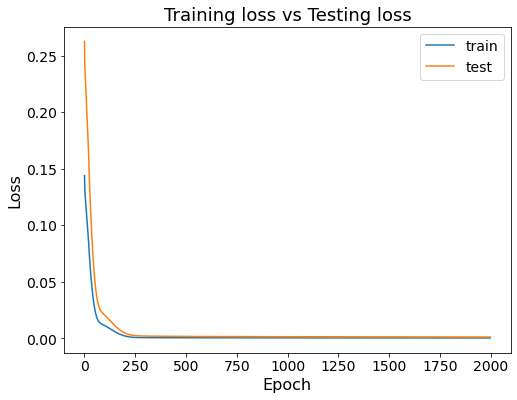

In [29]:
lr = 0.00001
EPOCHS = 2000
model_mlp_60.compile(
              optimizer=Adam(learning_rate=lr, decay=lr/EPOCHS),
#               optimizer='adam',
              loss='mse',
              metrics=['mae'])

history = model_mlp_60.fit(train_X, train_y,
                    batch_size=512,
                    epochs=EPOCHS,
                    validation_data=(test_X, test_y),
                    verbose=2,
                    shuffle=False)

plt.rcParams["figure.figsize"] = (8, 6)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=14)
plt.title("Training loss vs Testing loss", fontsize=18)
# plt.savefig('graph/rnn_loss.png', dpi=300)
plt.show()

In [47]:
# # Save the entire model as a SavedModel.
# !mkdir -p saved_model
model_mlp_60.save('saved_model/mlp_11')

INFO:tensorflow:Assets written to: saved_model/mlp_11/assets


In [30]:
# from keras.models import load_model

# model_load = load_model('saved_model/model_rnn_60')

### Prediction

#### Test set

In [31]:
yhat = model_mlp_60.predict(test_X)
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(test_y)

inv_yhat = pd.DataFrame(inv_yhat)
inv_y = pd.DataFrame(inv_y)
print("inv_y.shape, inv_yhat.shape", inv_y.shape, inv_yhat.shape)

602/602 [==============================] - 0s 394us/step
inv_y.shape, inv_yhat.shape (19249, 96) (19249, 96)


In [32]:
inv_y

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.17,0.20,0.27,0.23,0.22,0.23,0.28,0.26,0.56,0.61,...,1.97,1.95,1.36,1.39,1.48,1.43,0.94,0.98,1.07,1.01
1,0.22,0.23,0.28,0.26,0.56,0.61,0.62,0.60,1.05,1.06,...,1.48,1.43,0.94,0.98,1.07,1.01,0.44,0.44,0.58,0.51
2,0.56,0.61,0.62,0.60,1.05,1.06,1.07,1.07,1.46,1.47,...,1.07,1.01,0.44,0.44,0.58,0.51,0.35,0.39,0.42,0.38
3,1.05,1.06,1.07,1.07,1.46,1.47,1.50,1.51,1.88,1.94,...,0.58,0.51,0.35,0.39,0.42,0.38,0.56,0.57,0.62,0.60
4,1.46,1.47,1.50,1.51,1.88,1.94,1.93,1.91,2.05,2.05,...,0.42,0.38,0.56,0.57,0.62,0.60,1.03,1.03,1.08,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19244,1.93,1.95,2.00,2.00,2.19,2.21,2.25,2.25,2.11,2.12,...,0.23,0.21,0.77,0.74,0.75,0.75,1.24,1.25,1.31,1.29
19245,2.19,2.21,2.25,2.25,2.11,2.12,2.22,2.19,1.65,1.69,...,0.75,0.75,1.24,1.25,1.31,1.29,1.62,1.64,1.68,1.66
19246,2.11,2.12,2.22,2.19,1.65,1.69,1.76,1.72,1.24,1.24,...,1.31,1.29,1.62,1.64,1.68,1.66,1.98,2.00,2.04,2.04
19247,1.65,1.69,1.76,1.72,1.24,1.24,1.37,1.32,0.76,0.73,...,1.68,1.66,1.98,2.00,2.04,2.04,2.13,2.13,2.21,2.18


In [33]:
inv_yhat

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.107083,0.247082,0.366367,0.527394,0.074806,0.341669,0.415424,0.558077,0.475339,0.536041,...,1.864535,2.118129,1.169642,1.418853,1.460985,1.662752,0.624322,0.915661,0.931379,1.048963
1,0.181518,0.296067,0.431494,0.587116,0.417750,0.612903,0.702605,0.879246,0.973219,1.006193,...,1.388219,1.580455,0.655749,0.893047,0.955449,1.100912,0.242598,0.503983,0.564968,0.649729
2,0.520471,0.590260,0.713259,0.923338,0.904006,1.046910,1.116158,1.340792,1.498225,1.498610,...,0.921781,1.065511,0.290802,0.486718,0.606913,0.712322,0.111918,0.341794,0.417108,0.504734
3,0.999381,1.051567,1.148000,1.406330,1.440900,1.534598,1.585381,1.857156,1.936820,1.938059,...,0.557616,0.665643,0.132445,0.279511,0.427219,0.517324,0.221034,0.406374,0.490680,0.606617
4,1.529840,1.583938,1.646618,1.951229,1.875209,1.982803,2.001882,2.315283,2.166486,2.196229,...,0.430827,0.527777,0.284528,0.393578,0.536993,0.646322,0.596577,0.750136,0.824803,0.979285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19244,1.955260,2.007608,2.032073,2.395905,2.059254,2.292722,2.237862,2.588304,2.053152,2.160527,...,0.242794,0.339361,0.451380,0.544011,0.694100,0.845752,0.995352,1.125826,1.183279,1.368474
19245,2.160858,2.250499,2.247187,2.621235,1.974018,2.255048,2.189719,2.526115,1.702792,1.846352,...,0.627369,0.769873,1.025405,1.102762,1.211372,1.422776,1.556726,1.692550,1.709415,1.945344
19246,2.071416,2.215696,2.196172,2.541764,1.641144,1.878784,1.855018,2.135136,1.155743,1.308106,...,1.129592,1.331942,1.570179,1.625844,1.690337,1.950417,1.967999,2.111459,2.090693,2.385656
19247,1.681529,1.893884,1.886919,2.150933,1.121110,1.336341,1.371903,1.584505,0.562457,0.741205,...,1.653041,1.908686,1.972198,2.053126,2.041800,2.340105,2.112755,2.274645,2.244527,2.554744


In [34]:
error_abs = abs(inv_yhat - inv_y)
# error_abs

In [35]:
error = inv_yhat - inv_y
# error

In [36]:
## 17544 = 24 * (365+366)
error_19_20 = error.iloc[-17544:, :]

In [37]:
len(error_19_20)

17544

In [46]:
inv_y.to_csv('./output/inv_y_mlp_11.csv')
inv_yhat.to_csv('./output/inv_yhat_mlp_11.csv')
error.to_csv('output/error_mlp_11.csv')

### Performance

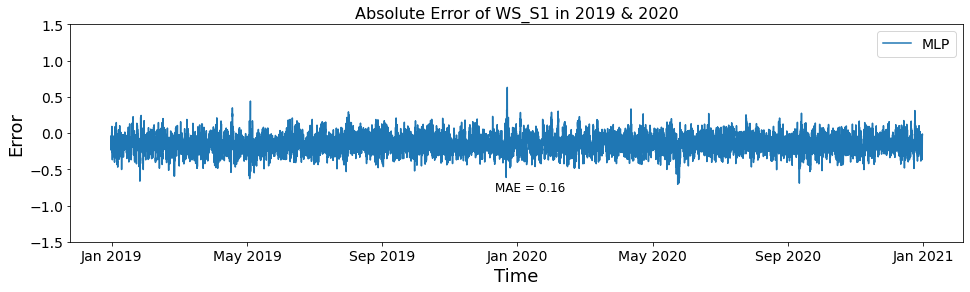

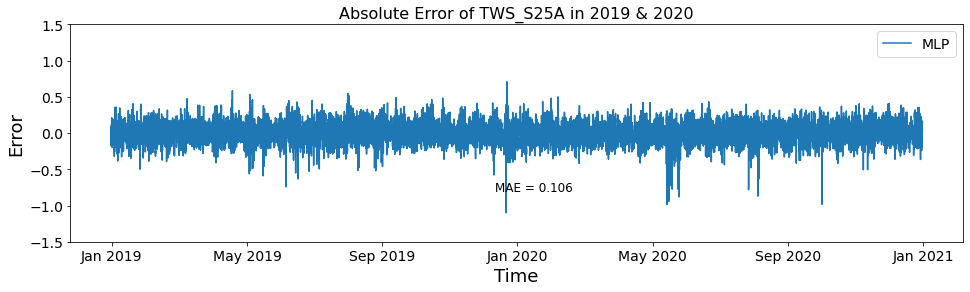

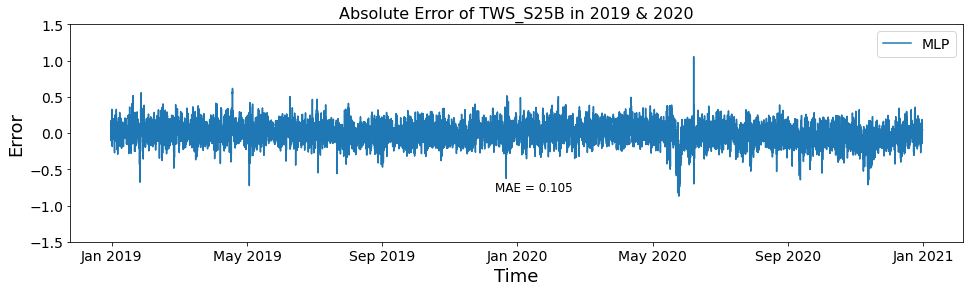

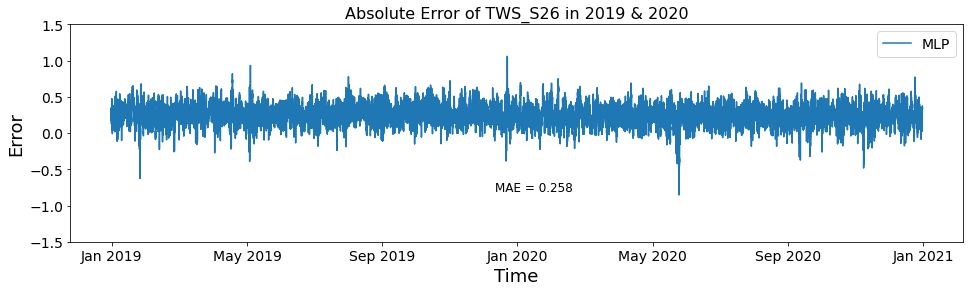

In [45]:
plt.rcParams["figure.figsize"] = (16, 4)
months = ['Jan 2019', 'May 2019', 'Sep 2019', 'Jan 2020', 'May 2020', 'Sep 2020', 'Jan 2021']

# 17544 = 24 hours * (365+366) days
locations = ['WS_S1', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']
for i, col in enumerate([-4, -3, -2, -1]):
    plt.plot(error.iloc[-17544:, col], label='MLP')
    plt.xlabel('Time', fontsize=18)
    plt.ylabel('Error', fontsize=18)
    plt.ylim(-1.5, 1.5)
    plt.xticks(np.arange(1726, 19270, 2923), months, fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.title('Absolute Error of {} in 2019 & 2020'.format(locations[i]), fontsize=16)
    # plt.savefig('figures/Test_Error_rnn_chop.png', dpi=300)
    plt.text(10000, -0.8, 'MAE = {}'.format(float("{:.3f}".format(sum(abs(error.iloc[-17544:, col]))/17544))), fontsize=12)
    plt.show()
    plt.close()

In [39]:
# plt.rcParams["figure.figsize"] = (16, 4)
# months = ['Jan 2019', 'May 2019', 'Sep 2019', 'Jan 2020', 'May 2020', 'Sep 2020', 'Jan 2021']

# # 17544 = 24 hours * (365+366) days
# locations = ['WS_S1', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']
# for i, col in enumerate([-4, -3, -2, -1]):
#     plt.plot(error.iloc[:, col], label='MLP')
#     plt.xlabel('Time', fontsize=18)
#     plt.ylabel('Error', fontsize=18)
#     plt.ylim(-1.2, 1.2)
#     plt.xticks(np.arange(1726, 19270, 2923), months, fontsize=14)
#     plt.yticks(fontsize=14)
#     plt.legend(fontsize=14)
#     plt.title('Absolute Error of {} in 2019 & 2020'.format(locations[i]), fontsize=16)
#     # plt.savefig('figures/Test_Error_rnn_chop.png', dpi=300)
#     plt.text(10000, -0.7, 'MAE = {}'.format(float("{:.3f}".format(sum(abs(error.iloc[-17544:, col]))/17544))), fontsize=12)
#     plt.show()
#     plt.close()

In [40]:
error_24th_hour = error.iloc[:, [-4, -3, -2, -1]]  # last 4 columns --> t+12
error_24th_hour

,92,93,94,95
0,-0.315678,-0.064339,-0.138621,0.038963
1,-0.197402,0.063983,-0.015032,0.139729
2,-0.238082,-0.048206,-0.002892,0.124734
3,-0.338966,-0.163626,-0.129320,0.006617
4,-0.433423,-0.279864,-0.255197,-0.080715
...,...,...,...,...
19244,-0.244648,-0.124174,-0.126721,0.078474
19245,-0.063274,0.052550,0.029415,0.285344
19246,-0.012001,0.111459,0.050693,0.345656
19247,-0.017245,0.144645,0.034527,0.374744


In [41]:
# error.rename(columns = {'11':'WS_S1', '23':'TWS_S25A', '35':'TWS_S25B', '47':'TWS_S26'}, inplace = True)

In [42]:
error_24th_hour.columns = ['WS_S1', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']
error_24th_hour

,WS_S1,TWS_S25A,TWS_S25B,TWS_S26
0,-0.315678,-0.064339,-0.138621,0.038963
1,-0.197402,0.063983,-0.015032,0.139729
2,-0.238082,-0.048206,-0.002892,0.124734
3,-0.338966,-0.163626,-0.129320,0.006617
4,-0.433423,-0.279864,-0.255197,-0.080715
...,...,...,...,...
19244,-0.244648,-0.124174,-0.126721,0.078474
19245,-0.063274,0.052550,0.029415,0.285344
19246,-0.012001,0.111459,0.050693,0.345656
19247,-0.017245,0.144645,0.034527,0.374744


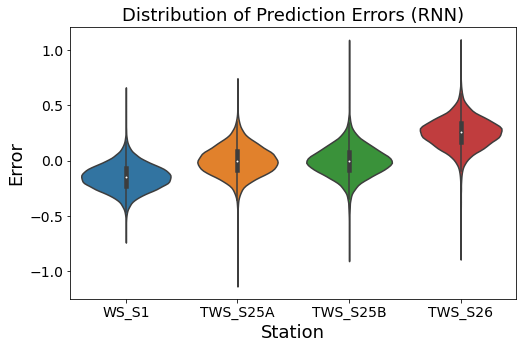

In [43]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (8, 5)
# plt.grid()
plt.xlabel('Station', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of Prediction Errors (RNN)', fontsize='18')
ax = sns.violinplot(data=error_24th_hour[['WS_S1', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']])

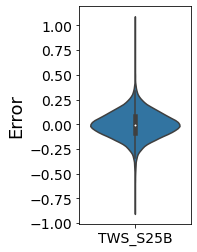

In [44]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (2, 4)
# plt.grid()
# plt.xlabel('Station', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title('Distribution of Prediction Errors', fontsize='18')

ax = sns.violinplot(data=error_24th_hour[[ 'TWS_S25B']])

In [ ]:
# # Whole test set: WS = ['WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']
# RMSES, MAES = [], []
# for i in range(inv_yhat.shape[1]):
#     RMSE = sqrt(mean_squared_error(inv_y.iloc[:, i], inv_yhat.iloc[:, i]))
#     MAE = mean_absolute_error(inv_y.iloc[:, i], inv_yhat.iloc[:, i])
#     RMSES.append(float("{:.4f}".format(RMSE)))
#     MAES.append(float("{:.4f}".format(MAE)))
    
# print("Test RMSE for WS_S1, TWS_S25A, TWS_S25B, TWS_S26:", RMSES)
# print("Test MAE for WS_S1, TWS_S25A, TWS_S25B, TWS_S26:", MAES)

In [123]:
# # Whole test set: WS = ['WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']
# MAE, RMSE = [], []
# for row in range(len(inv_y)):
#     row_rmse, row_mae = [], []
#     for i in range(0, inv_y.shape[1], 12):
#         row_mae.append(float("{:.3f}".format(mean_absolute_error(inv_y.iloc[row, i:i+12], inv_yhat.iloc[row, i:i+12]))))
# #         row_rmse.append(float("{:.3f}".format(sqrt(mean_squared_error((inv_y.iloc[row, i:i+12], inv_yhat.iloc[row, i:i+12]))))))
#     MAE.append(np.array(row_mae))
# #     RMSE.append(np.array(row_rmse))

# print(np.array(MAE))
# # print(RMSE) 
# # print("Test RMSE for WS_S1, TWS_S25A, TWS_S25B, TWS_S26:", RMSES)
# # print("Test MAE for WS_S1, TWS_S25A, TWS_S25B, TWS_S26:", MAES)

In [124]:
# column_1 = []
# for row in np.array(MAE):
#     column_1.append(row[0])   

# print("1st column =", column_1)
# print(sum(column_1)/len(column_1))

In [125]:
# plt.hist(column_1)

In [126]:
# mean_absolute_error(inv_y.iloc[0, i:i+12], inv_yhat.iloc[0, i:i+12])

In [127]:
# # Whole test set: WS = ['WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']
# RMSES, MAES = [], []
# for i in range(inv_yhat.shape[1]):
#     RMSE = sqrt(mean_squared_error(inv_y.iloc[:, i:i+12], inv_yhat.iloc[:, i:i+12]))
#     MAE = mean_absolute_error(inv_y.iloc[0, i:i+12], inv_yhat.iloc[0, i:i+12])
#     RMSES.append(float("{:.3f}".format(RMSE)))
#     MAES.append(float("{:.3f}".format(MAE)))
# print("Test RMSE for WS_S1, TWS_S25A, TWS_S25B, TWS_S26:", RMSES)
# print("Test MAE for WS_S1, TWS_S25A, TWS_S25B, TWS_S26:", MAES)


# # # 'WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26', 'HWS_S25A', 'HWS_S25B', 'HWS_S26'
# # plt.rcParams["figure.figsize"] = (8, 6)
# # plt.title('Comparison RMSE & MAE at Different Locations', fontsize=18)
# # plt.plot(RMSES, label='RMSE', marker='D')
# # plt.plot(MAES, label='MAE', marker='o')
# # plt.xlabel('Locations', fontsize=16)
# # plt.ylabel('Error', fontsize=16)
# # plt.xticks(np.arange(5), ['S1', 'S4', 'S25A', 'S25B', 'S26'], fontsize=14)
# # plt.yticks(fontsize=14)
# # # plt.axhline(y=0.15, color='red', linestyle='-', linewidth=2)
# # # plt.axhline(y=0.25, color='orange', linestyle='-', linewidth=2)
# # # plt.text(0, 0.26, 'R=0.25', fontsize=14)
# # # plt.text(0, 0.16, 'R=0.15', fontsize=14)
# # plt.legend(fontsize=14)
# # plt.show()

### Visualization

#### Visualize some period (09/10/2022 - 09/16/2022)

In [128]:
# date = ['09/10', '09/11', '09/12', '09/13', '09/14', '09/15', '09/16']
# station = ['WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']
# for i in range(5):
#     rmse = sqrt(mean_squared_error(inv_y.iloc[:144, i], inv_yhat.iloc[:144, i]))    # 99635:100499
#     mae = mean_absolute_error(inv_y.iloc[:144, 0], inv_yhat.iloc[:144, 0])
#     plt.rcParams["figure.figsize"] = (8, 6)
#     plt.plot(inv_yhat.iloc[:144, i], label='prediction', linewidth=2)
#     plt.plot(inv_y.iloc[:144, i], label='truth', linewidth=2)
#     plt.title('Predicted & Actual Value of {}'.format(station[i]), fontsize=18)
#     # plt.text(99858, 3.35, 'MAE: {:.4f}'.format(MAE_WS_S1), fontsize=13)
#     plt.xlabel('Time', fontsize=16)
#     plt.ylabel('Water Stage', fontsize=16)
#     # plt.xticks(np.arange(99635, 100500, 144), date, fontsize=14)
#     plt.yticks(fontsize=14)
#     plt.legend(fontsize=13, loc='upper left')
#     plt.show()
#     plt.close()

#### Visualize error values

In [129]:
# n_train_hours

In [41]:
# ['WS_S1', 'WS_S4', 'FLOW_S25A', 'GATE_S25A', 'HWS_S25A', 'TWS_S25A', 
# 'FLOW_S25B', 'GATE_S25B', 'HWS_S25B', 'TWS_S25B', 
# 'FLOW_S26', 'GATE_S26', 'HWS_S26', 'TWS_S26', 'PUMP_S26', 'mean']

In [130]:
# date = ['10/2018', '04/2019', '10/2019', '04/2019', '10/2020']
# # station = ['WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']
# station = ['S1', 'S4', 'S25A', 'S25B', 'S26']

# plt.rcParams["figure.figsize"] = (16, 2)

# for i in range(5):
#     error = abs(inv_yhat.iloc[:, i] - inv_y.iloc[:, i])
#     plt.plot(error, label='{}'.format(station[i]), linewidth=2)

# plt.xlabel('Time', fontsize=16)
# plt.ylabel('Abs Error', fontsize=16)
# plt.xticks(np.arange(0, len(inv_y), 4449), date, fontsize=14)  # len(inv_y) = 19238
# plt.yticks(fontsize=14)
# plt.legend(fontsize=10, loc='upper left')
# plt.show()
# plt.close()


# # visualize rain in test set
# plt.plot(data.iloc[76951:, -1])
# plt.xlabel('Time', fontsize=16)
# plt.ylabel('Rainfall (Inch)', fontsize=16)
# plt.xticks(np.arange(0, len(inv_y), 4449), date, fontsize=14)  # len(inv_y) = 19238
# plt.yticks(fontsize=14)
# plt.show()
# plt.close()


# # visualize pump in test set
# plt.plot(data.iloc[76951:, -2])
# plt.xlabel('Time', fontsize=16)
# plt.ylabel('Pump_S26', fontsize=16)
# plt.xticks(np.arange(0, len(inv_y), 4449), date, fontsize=14)  # len(inv_y) = 19238
# plt.yticks(fontsize=14)
# plt.show()
# plt.close()

# # visualize gate_s25a in test set
# plt.plot(data.iloc[76951:, 3])
# plt.xlabel('Time', fontsize=16)
# plt.ylabel('Gate_S25A', fontsize=16)
# plt.xticks(np.arange(0, len(inv_y), 4449), date, fontsize=14)  # len(inv_y) = 19238
# plt.yticks(fontsize=14)
# plt.show()
# plt.close()

# # visualize gate_s25b in test set
# plt.plot(data.iloc[76951:, 7])
# plt.xlabel('Time', fontsize=16)
# plt.ylabel('Gate_S26B', fontsize=16)
# plt.xticks(np.arange(0, len(inv_y), 4449), date, fontsize=14)  # len(inv_y) = 19238
# plt.yticks(fontsize=14)
# plt.show()
# plt.close()

# # visualize gate_s26 in test set
# plt.plot(data.iloc[76951:, 11])
# plt.xlabel('Time', fontsize=16)
# plt.ylabel('Gate_S26', fontsize=16)
# plt.xticks(np.arange(0, len(inv_y), 4449), date, fontsize=14)  # len(inv_y) = 19238
# plt.yticks(fontsize=14)
# plt.show()
# plt.close()

In [131]:
# # visualize water stage error seperately
# for i in range(5):
#     plt.rcParams["figure.figsize"] = (16, 2)
#     error = abs(inv_yhat.iloc[:, i] - inv_y.iloc[:, i])
#     plt.plot(error, label='{}'.format(station[i]), linewidth=2)
#     plt.xlabel('Time', fontsize=16)
#     plt.ylabel('Abs Error', fontsize=16)
#     plt.xticks(np.arange(0, len(inv_y), 4449), date, fontsize=14)  # len(inv_y) = 19238
#     plt.yticks(fontsize=14)
#     plt.legend(fontsize=12, loc='upper left')
#     plt.show()
#     plt.close()